<a href="https://colab.research.google.com/github/ykim879/machine.learning.soccer/blob/gh-pages/Copy_of_Soccer_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
from sklearn import linear_model
import pandas as pd

In [4]:
# extract data
dataset = pd.read_excel("linear_regression_data_(co2_EV_sales).xlsx")
dataset = dataset.iloc[:,1:]

co2emissions = np.asarray(dataset.iloc[1:,0].tolist())
evsales = np.asarray(dataset.iloc[1:,1].tolist())
totalcarsales = np.asarray(dataset.iloc[1:,2].tolist())
nonevsales = totalcarsales-evsales
n_total = len(co2emissions)
co2emissions, evsales, totalcarsales, nonevsales,n_total

(array([1813. , 1778.1, 1808.1, 1826.4, 1851.8, 1889.6, 1905.1, 1950. ]),
 array([  9178,  12820,  46832,  60363, 477674, 483753,  95610, 203625]),
 array([12695712, 15376264, 15490245, 16424017, 17404970, 17500719,
        17212565, 17323849]),
 array([12686534, 15363444, 15443413, 16363654, 16927296, 17016966,
        17116955, 17120224]),
 8)

In [5]:
#slope by scikit linear regression
reg = linear_model.LinearRegression(fit_intercept=True)
x1 = np.zeros((n_total, 2))
x1[:,0] = evsales
x1[:,1] = nonevsales
y1 = co2emissions.reshape(-1,1)
reg.fit(x1,y1)
pred = reg.predict(x1)
reg.set_params(normalize = True)
print('CO2 = ', reg.coef_[0,0], '(EV Sales) + ', reg.coef_[0,1], '(Non-EV Sales) + ', reg.intercept_[0])

CO2 =  3.8683407365550034e-05 (EV Sales) +  2.1654615503991612e-05 (Non-EV Sales) +  1499.4639361015925


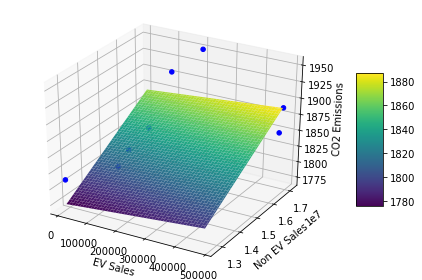

In [6]:
#generate prediction data for the plane
possible_ev = np.arange(np.amin(evsales),np.amax(evsales),(np.amax(evsales)-np.amin(evsales))/100)
possible_non = np.arange(np.amin(nonevsales),np.amax(nonevsales),(np.amax(nonevsales)-np.amin(nonevsales))/100)

possible_ev = possible_ev.reshape(1, possible_ev.shape[0])
possible_non = possible_non.reshape(possible_non.shape[0], 1)

possible_ev_mesh = np.repeat(possible_ev, possible_ev.shape[1], axis=0)
possible_non_mesh = np.repeat(possible_non, possible_non.shape[0], axis=1)
pred_co2 = reg.coef_[:,0]*possible_ev_mesh + reg.coef_[:,1]*possible_non_mesh + reg.intercept_

# #plotting linear regression
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(possible_ev_mesh, possible_non_mesh, pred_co2, cmap='viridis')
ax.scatter(evsales,nonevsales,co2emissions,c='blue',marker='o',alpha=1)

ax.set_xlabel('EV Sales')
ax.set_ylabel('Non EV Sales')
ax.set_zlabel('CO2 Emissions')

plt.tight_layout()
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()